In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# this line is to show all the columns
pd.set_option('display.max_columns', None) 

# Inicio de variables
YEAR = 2020
ESTADO = 24
MUJER_ID = 1
HOMBRE_ID = 2
RESULTADO_POSITIVO_ANTIGENOS = 1
FECHA_DEFUNCION_NO_MUERTE = '9999-99-99'
SI_VALUE = 1
NO_VALUE = 2

In [27]:

# try reading the csv file
try:
    df = pd.read_csv('COVID19MEXICO2020SLP.csv')
except:
    df = pd.read_csv('COVID19MEXICO2020.csv') #estos datos incluyen del 2021
    print("registros totales: ", len(df))
    # convert date to datetime format
    # pasamos a un formato de fecha, pues este pasa como object
    df['FECHA_INGRESO'] = pd.to_datetime(df['FECHA_INGRESO'], format='%Y-%m-%d') 
    # get record from san luis putosi, which is ENTIDAD_UM = 24
    # filtramos los datos de san luis potosi
    df = df[df['ENTIDAD_RES'] == ESTADO] 
    # create a new column with year data from FECHA_INGRESO
    #creamos una nueva columna con el año de ingreso
    df['year'] = df['FECHA_INGRESO'].dt.year  
    # take values only from 2020
    # filtramos los datos del 2020
    df = df[df['year'] == YEAR] 
    # drop year column
    # eliminamos la columna de año
    df.drop('year', axis=1, inplace=True) 
    
    # save it to a new csv file
    # guardamos los datos en un nuevo archivo csv
    df.to_csv('COVID19MEXICO2020SLP.csv', index=False)


C:\Users\ouarit\AppData\Local\Temp\ipykernel_2156\3093697218.py:3: DtypeWarning: Columns (38) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('COVID19MEXICO2020SLP.csv')


In [28]:
# get datafreame where covid result is positive
# filtramos los datos donde el resultado es positivo
print("registros de San Luis Potosí del 2020: ", len(df))
df = df[df['RESULTADO_ANTIGENO'] == RESULTADO_POSITIVO_ANTIGENOS]
print("total de resultados positivos: ", len(df))

registros de San Luis Potosí del 2020:  99016
total de resultados positivos:  540


In [29]:
# show columns names
df.columns

Index(['FECHA_ACTUALIZACION', 'ID_REGISTRO', 'ORIGEN', 'SECTOR', 'ENTIDAD_UM',
       'SEXO', 'ENTIDAD_NAC', 'ENTIDAD_RES', 'MUNICIPIO_RES', 'TIPO_PACIENTE',
       'FECHA_INGRESO', 'FECHA_SINTOMAS', 'FECHA_DEF', 'INTUBADO', 'NEUMONIA',
       'EDAD', 'NACIONALIDAD', 'EMBARAZO', 'HABLA_LENGUA_INDIG', 'INDIGENA',
       'DIABETES', 'EPOC', 'ASMA', 'INMUSUPR', 'HIPERTENSION', 'OTRA_COM',
       'CARDIOVASCULAR', 'OBESIDAD', 'RENAL_CRONICA', 'TABAQUISMO',
       'OTRO_CASO', 'TOMA_MUESTRA_LAB', 'RESULTADO_LAB',
       'TOMA_MUESTRA_ANTIGENO', 'RESULTADO_ANTIGENO', 'CLASIFICACION_FINAL',
       'MIGRANTE', 'PAIS_NACIONALIDAD', 'PAIS_ORIGEN', 'UCI'],
      dtype='object')

In [30]:
# get record where survive is yes from san luis potosi,
# whom is FECHA_DEF = 9999-99-99 
survive = df[df['FECHA_DEF'] == FECHA_DEFUNCION_NO_MUERTE]
# check how many records are there
print("total de sobrevivientes: ", len(survive))

total de sobrevivientes:  500


In [31]:
# lets get the data of how many people died with each sickness
# get date where diabetes is yes, which is DIABETES = 1
die = df[df['FECHA_DEF'] != FECHA_DEFUNCION_NO_MUERTE]
die['FECHA_DEF'] = pd.to_datetime(die['FECHA_DEF'], format='%Y-%m-%d')

C:\Users\ouarit\AppData\Local\Temp\ipykernel_2156\764493166.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  die['FECHA_DEF'] = pd.to_datetime(die['FECHA_DEF'], format='%Y-%m-%d')


In [32]:
print("registros de supervivencia: ", len(survive))
print("registros de muertes: ", len(die))


registros de supervivencia:  500
registros de muertes:  40


In [33]:
# get count where gender is female and survived, which is SEXO = 1
conteo_mujeres = survive[survive['SEXO'] == MUJER_ID].shape[0]
# get count where gender is male and survived, whilch is SEXO = 2
conteo_hombres = survive[survive['SEXO'] == HOMBRE_ID].shape[0]
# get count where gender is not especificated and survived, which is SEXO = 99
conteo_no_especificado = survive[survive['SEXO'] == 99].shape[0]
print('Total de mujeres: ', conteo_mujeres)
print('Total de hombres: ', conteo_hombres)
print('Total de no especificados: ', conteo_no_especificado)
print('Total: ', conteo_mujeres + conteo_hombres)

porcentaje_sobrevientes_mujeres = conteo_mujeres / (conteo_mujeres + conteo_hombres) * 100
porcentaje_sobrevientes_hombres = conteo_hombres / (conteo_mujeres + conteo_hombres) * 100


print('Porcentaje de sobrevivientes mujeres: ', round(porcentaje_sobrevientes_mujeres, 2))
print('Porcentaje de sobrevivientes hombres: ', round(porcentaje_sobrevientes_hombres, 2))

Total de mujeres:  260
Total de hombres:  240
Total de no especificados:  0
Total:  500
Porcentaje de sobrevivientes mujeres:  52.0
Porcentaje de sobrevivientes hombres:  48.0


In [34]:
# get the porcentage of men who survived
porcentaje_hombres = survive[survive['SEXO'] == HOMBRE_ID].shape[0] / df[df['SEXO'] == HOMBRE_ID].shape[0] * 100

# get the porcentage of women who survived
porcentaje_mujeres = survive[survive['SEXO'] == MUJER_ID].shape[0] / df[df['SEXO'] == MUJER_ID].shape[0] * 100

# get the porcentage of people who died
porcentaje_supervivencia = survive.shape[0] / df.shape[0] * 100

# print the results round to 2 decimals
print('Porcentaje de hombres que sobrevivieron: ', round(porcentaje_hombres, 2))
print('Porcentaje de mujeres que sobrevivieron: ', round(porcentaje_mujeres, 2))
print('porcentaje de supervivencia: ', round(porcentaje_supervivencia, 2))

Porcentaje de hombres que sobrevivieron:  91.25
Porcentaje de mujeres que sobrevivieron:  93.86
porcentaje de supervivencia:  92.59


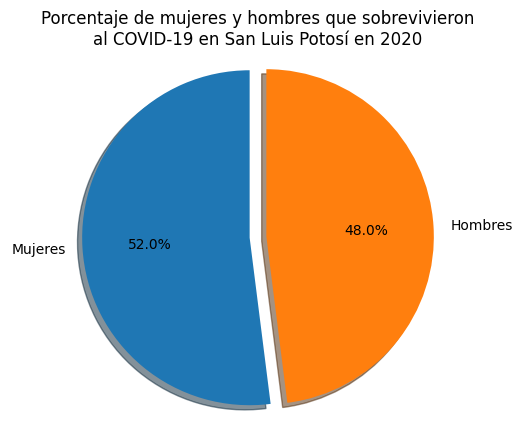

In [35]:
# make a pie chart, omiting "No especificado" type because it has no data
labels = 'Mujeres', 'Hombres'
sizes = [porcentaje_sobrevientes_mujeres, porcentaje_sobrevientes_hombres]
explode = (0, 0.1)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
# name the chart
plt.title('Porcentaje de mujeres y hombres que sobrevivieron\nal COVID-19 en San Luis Potosí en 2020')
# save the chart
fig1.savefig('porcentaje_mujeres_hombres.png')
# show the chart
plt.show()


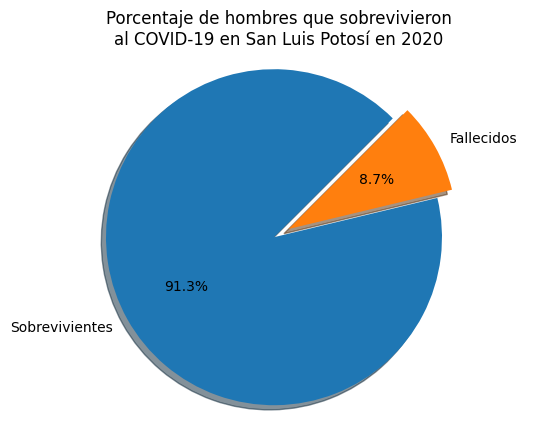

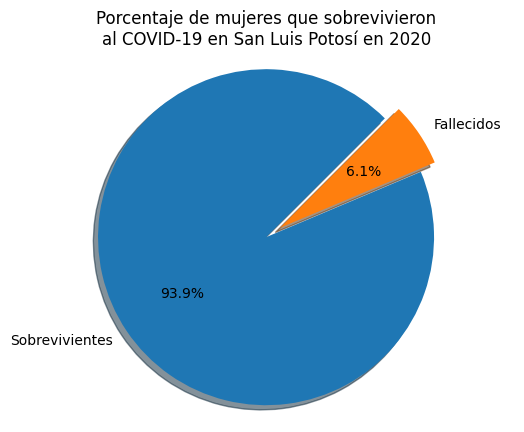

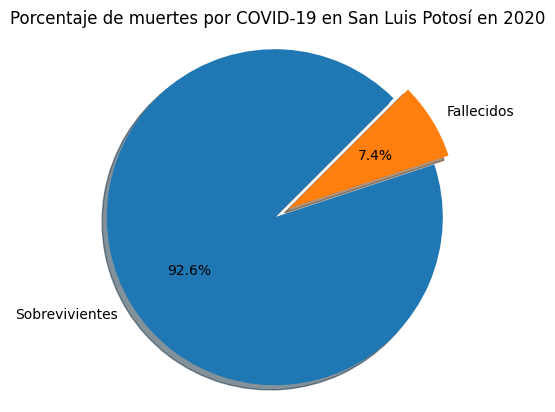

In [36]:
# let's create a pie chart for each porcentage
# men who survived
labels = 'Sobrevivientes', 'Fallecidos'
sizes = [porcentaje_hombres, 100-porcentaje_hombres]
explode = (0, 0.1)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=45)
ax1.axis('equal')
# name the chart
plt.title('Porcentaje de hombres que sobrevivieron\nal COVID-19 en San Luis Potosí en 2020')
# save the chart
fig1.savefig('porcentaje_hombres.png')
# show the chart
plt.show()

# women who survived
labels = 'Sobrevivientes', 'Fallecidos'
sizes = [porcentaje_mujeres, 100 - porcentaje_mujeres]
explode = (0, 0.1)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=45)
ax1.axis('equal')
# name the chart
plt.title('Porcentaje de mujeres que sobrevivieron\nal COVID-19 en San Luis Potosí en 2020')
# save the chart
fig1.savefig('porcentaje_mujeres.png')
# show the chart
plt.show()

# total porcentage of people who died
labels = 'Sobrevivientes', 'Fallecidos'
sizes = [porcentaje_supervivencia, 100-porcentaje_supervivencia]
explode = (0, 0.1)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=45)
ax1.axis('equal')
# name the chart
plt.title('Porcentaje de muertes por COVID-19 en San Luis Potosí en 2020')
# save the chart
fig1.savefig('porcentaje_muertes.png')
# show the chart
plt.show()



In [37]:
# get the max age from san luis potosi
max_age = survive['EDAD'].max()
# get the min age from san luis potosi
min_age = survive['EDAD'].min()

print('La edad máxima es: ', max_age)
print('La edad mínima es: ', min_age)

# create a list with the age groups
age_groups = [-1, 20, 40, 60, 80, 100]

# calculate the count of people in each age group
conteo_edades = pd.cut(survive['EDAD'], age_groups).value_counts(sort=False)

# show the count of people in each age group
print(conteo_edades)

La edad máxima es:  94
La edad mínima es:  0
(-1, 20]      31
(20, 40]     237
(40, 60]     160
(60, 80]      59
(80, 100]     13
Name: EDAD, dtype: int64


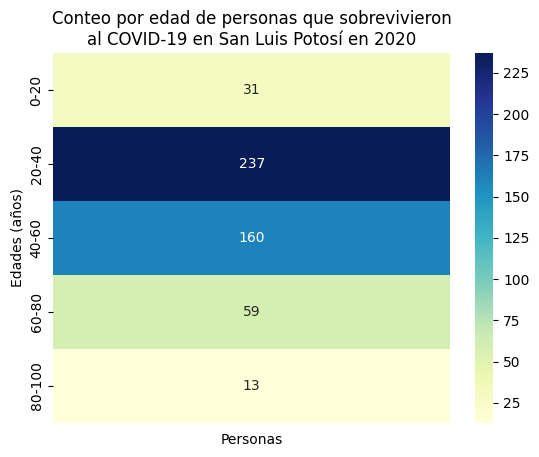

In [38]:
# create a heapmap with the count of people in each age group
labels = ['0-20', '20-40', '40-60', '60-80', '80-100']
sns.heatmap(pd.DataFrame(conteo_edades), annot=True, cmap="YlGnBu", fmt='g', xticklabels=False, yticklabels=labels)
# Quit EDAD label
plt.xlabel('')
# set the x label
plt.xlabel('Personas')
# set the y label
plt.ylabel('Edades (años)')
# name the chart
plt.title('Conteo por edad de personas que sobrevivieron\nal COVID-19 en San Luis Potosí en 2020')
# save the chart
plt.savefig('conteo_edades.png')
# show the chart
plt.show()

In [39]:
# get data where diabetes is yes, which is DIABETES = 1
diabetes = survive[survive['DIABETES'] == SI_VALUE]
# get data where diabetes is no, which is DIABETES = 2
no_diabetes = survive[survive['DIABETES'] == NO_VALUE]
# get data where diabetes is yes and person died, which is DIABETES = 1
diabetes_muertos = die[die['DIABETES'] == SI_VALUE]
# get data where diabetes is no and person died, which is DIABETES = 2
no_diabetes_muertos = die[die['DIABETES'] == NO_VALUE]
# get the percentage of people with diabetes that survived
porcentaje_sobrevivietes_diabetes = diabetes.shape[0] / df.shape[0] * 100
porcentaje_sobrevivietes_no_diabetes = no_diabetes.shape[0] / df.shape[0] * 100
# get the percentage of people with diabetes that died
porcentaje_muertes_diabetes = diabetes_muertos.shape[0] / df.shape[0] * 100
porcentaje_muertes_no_diabetes = no_diabetes_muertos.shape[0] / df.shape[0] * 100

# print the results
print('Total de personas con diabetes: ', diabetes.shape[0])
print('Total de personas sin diabetes: ', no_diabetes.shape[0])

print('Total de personas con diabetes que murieron: ', diabetes_muertos.shape[0])
print('Total de personas sin diabetes que murieron: ', no_diabetes_muertos.shape[0])

print('Porcentaje de personas con diabetes que sobrevivieron: ', round(porcentaje_sobrevivietes_diabetes, 2))
print('Porcentaje de personas sin diabetes que sobrevivieron: ', round(porcentaje_sobrevivietes_no_diabetes, 2))

print('Porcentaje de personas con diabetes que murieron: ', round(porcentaje_muertes_diabetes, 2))
print('Porcentaje de personas sin diabetes que murieron: ', round(porcentaje_muertes_no_diabetes, 2))


Total de personas con diabetes:  35
Total de personas sin diabetes:  460
Total de personas con diabetes que murieron:  19
Total de personas sin diabetes que murieron:  18
Porcentaje de personas con diabetes que sobrevivieron:  6.48
Porcentaje de personas sin diabetes que sobrevivieron:  85.19
Porcentaje de personas con diabetes que murieron:  3.52
Porcentaje de personas sin diabetes que murieron:  3.33


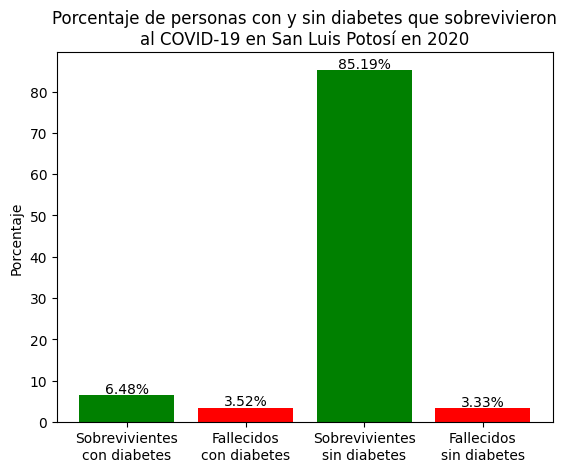

In [40]:
# let's create a stacked bar chart using the four porcentages we calculated
# create a list with the porcentages
porcentajes = [porcentaje_sobrevivietes_diabetes, porcentaje_muertes_diabetes, porcentaje_sobrevivietes_no_diabetes, porcentaje_muertes_no_diabetes]
# create a list with the labels
labels = ['Sobrevivientes\ncon diabetes', 'Fallecidos\ncon diabetes', 'Sobrevivientes\nsin diabetes', 'Fallecidos\nsin diabetes']
# create a list with the colors
colors = ['green', 'red', 'green', 'red']
# add the porcentages to the bars
for i in range(len(porcentajes)):
    plt.text(x=i, y=porcentajes[i]+0.5, s=str(round(porcentajes[i], 2))+'%', ha='center')
# create a list with the positions of the bars
x = np.arange(len(labels))
# create the chart
plt.bar(x, porcentajes, color=colors)
# set the x ticks
plt.xticks(x, labels)
# set the y label
plt.ylabel('Porcentaje')
# name the chart
plt.title('Porcentaje de personas con y sin diabetes que sobrevivieron\nal COVID-19 en San Luis Potosí en 2020')
# save the chart
plt.savefig('porcentaje_diabetes.png')
# show the chart
plt.show()

In [41]:
# get date where hypertension is yes, which is HIPERTENSION = 1
hipertension = survive[survive['HIPERTENSION'] == SI_VALUE]
# get date where hypertension is no, which is HIPERTENSION = 2
no_hipertension = survive[survive['HIPERTENSION'] == NO_VALUE]
# get date where hypertension is not especificated, which is HIPERTENSION = 99
hipertension_no_especificado = survive[survive['HIPERTENSION'] == 99]

print('Total de personas con hipertensión: ', hipertension.shape[0])
print('Total de personas sin hipertensión: ', no_hipertension.shape[0])
print('Total de personas sin especificar hipertensión: ', hipertension_no_especificado.shape[0])

Total de personas con hipertensión:  48
Total de personas sin hipertensión:  449
Total de personas sin especificar hipertensión:  0


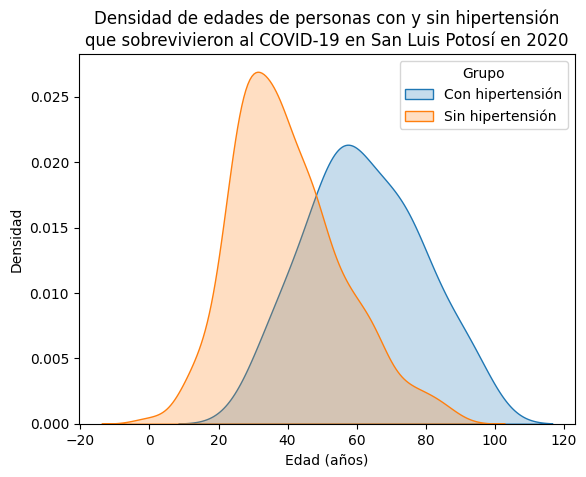

In [42]:
# make a density plot with the data, omiting "No especificado" type because it has no data
labels = 'Con hipertensión', 'Sin hipertensión'
sizes = [hipertension.shape[0], no_hipertension.shape[0]]
# make a density plot
sns.kdeplot(hipertension['EDAD'], label='Con hipertensión', fill=True)
sns.kdeplot(no_hipertension['EDAD'], label='Sin hipertensión', fill=True)
# make a legend
plt.legend(title='Grupo', labels=['Con hipertensión', 'Sin hipertensión'])
# name the chart
plt.title('Densidad de edades de personas con y sin hipertensión\nque sobrevivieron al COVID-19 en San Luis Potosí en 2020')
# name the x axis
plt.xlabel('Edad (años)')
# name the y axis
plt.ylabel('Densidad')

# save the chart
plt.savefig('densidad_hipertension.png')
# show the chart
plt.show()



In [43]:
# get data where diabetes is yes, which is DIABETES = 1
diabetes_die = die[die['DIABETES'] == SI_VALUE]
# group by month
diabetes_die = diabetes_die.groupby(diabetes_die['FECHA_DEF'].dt.month).size()

# get data where epoc is yes, which is EPOC = 1
epoc_die = die[die['EPOC'] == SI_VALUE]
# group by month
epoc_die = epoc_die.groupby(epoc_die['FECHA_DEF'].dt.month).size()

# get data where asma is yes, which is ASMA = 1
asma_die = die[die['ASMA'] == SI_VALUE]
# group by month
asma_die = asma_die.groupby(asma_die['FECHA_DEF'].dt.month).size()

# get data where inmusupr is yes, which is INMUSUPR = 1
inmusupr_die = die[die['INMUSUPR'] == SI_VALUE]
# group by month
inmusupr_die = inmusupr_die.groupby(inmusupr_die['FECHA_DEF'].dt.month).size()

# get data where hipertension is yes, which is HIPERTENSION = 1
hipertension_die = die[die['HIPERTENSION'] == SI_VALUE]
# group by month
hipertension_die = hipertension_die.groupby(hipertension_die['FECHA_DEF'].dt.month).size()

# get data where cardiovascular is yes, which is CARDIOVASCULAR = 1
cardiovascular_die = die[die['CARDIOVASCULAR'] == SI_VALUE]
# group by month
cardiovascular_die = cardiovascular_die.groupby(cardiovascular_die['FECHA_DEF'].dt.month).size()

# get data where obesidad is yes, which is OBESIDAD = 1
obesidad_die = die[die['OBESIDAD'] == SI_VALUE]
# group by month
obesidad_die = obesidad_die.groupby(obesidad_die['FECHA_DEF'].dt.month).size()






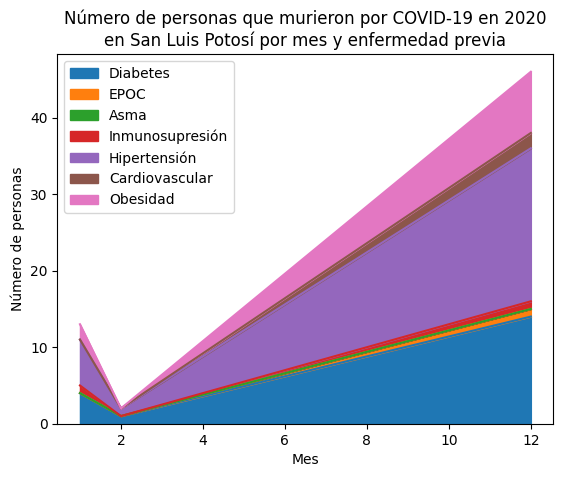

In [44]:
# make a stocked area plot with the data
data = pd.DataFrame({
    'Diabetes': diabetes_die,
    'EPOC': epoc_die,
    'Asma': asma_die,
    'Inmunosupresión': inmusupr_die,
    'Hipertensión': hipertension_die,
    'Cardiovascular': cardiovascular_die,
    'Obesidad': obesidad_die
})
# make a stacked area plot
ax = data.plot.area(stacked=True)
# set the x label
ax.set_xlabel('Mes')

# set the y label
ax.set_ylabel('Número de personas')

# set the title
ax.set_title('Número de personas que murieron por COVID-19 en 2020\nen San Luis Potosí por mes y enfermedad previa')
# save the chart
plt.savefig('enfermedades_previas_muerte.png')

# show the chart
plt.show()


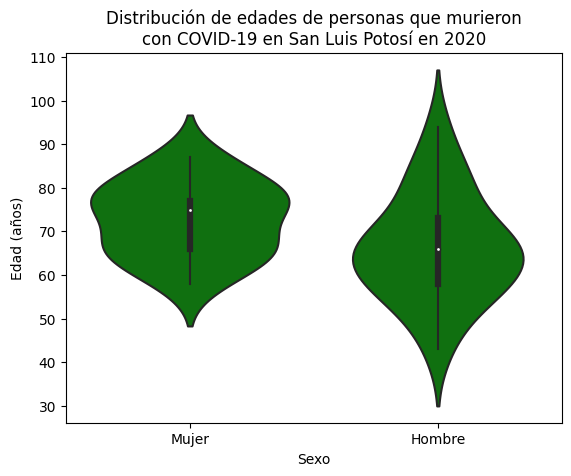

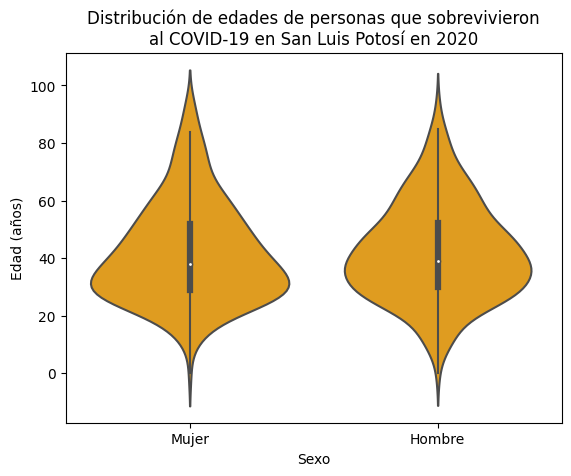

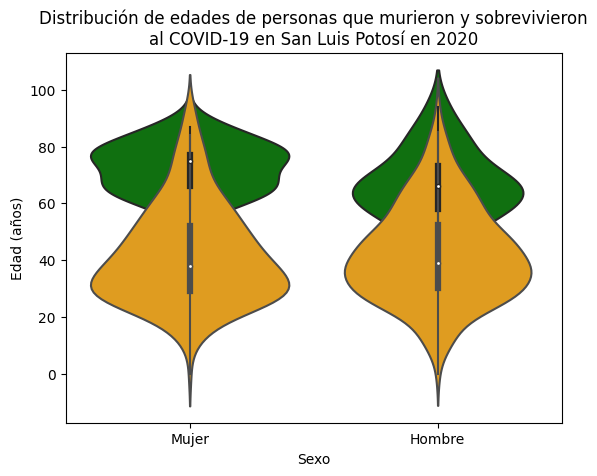

In [45]:
sns.violinplot(x='SEXO', y='EDAD', data=die, color='green', fill = True)

plt.xticks([0, 1], ['Mujer','Hombre'])

# set the x label
plt.xlabel('Sexo')
# set the y label
plt.ylabel('Edad (años)')
# set the title
plt.title('Distribución de edades de personas que murieron\ncon COVID-19 en San Luis Potosí en 2020')
# save the chart
plt.savefig('distribucion_edades_muerte.png')
# show the chart
plt.show()

sns.violinplot(x='SEXO', y='EDAD', data=survive, color='#FFA500', fill = True)

plt.xticks([0, 1], ['Mujer','Hombre'])

# set the x label
plt.xlabel('Sexo')
# set the y label
plt.ylabel('Edad (años)')
# set the title
plt.title('Distribución de edades de personas que sobrevivieron\nal COVID-19 en San Luis Potosí en 2020')
# save the chart
plt.savefig('distribucion_edades_sobrevivencia.png')
# show the chart
plt.show()


# create a overalay with the death data
sns.violinplot(x='SEXO', y='EDAD', data=die, color='green', fill = True)
#make a violin plot with the surviving people data
sns.violinplot(x='SEXO', y='EDAD', data=survive, color='#FFA500', fill = True)

plt.xticks([0, 1], ['Mujer','Hombre'])

# set the x label
plt.xlabel('Sexo')
# set the y label
plt.ylabel('Edad (años)')
# set the title
plt.title('Distribución de edades de personas que murieron y sobrevivieron\nal COVID-19 en San Luis Potosí en 2020')
# save the chart
plt.savefig('distribucion_edades_muerte_sobrevivencia.png')
# show the chart
plt.show()


In [46]:
# lets make a stadistics table which contains columns of persons who died and survived
# this sould be grouped by MUNICIPIO_RES

# count the number of people who died gruped by MUNICIPIO_RES omiting 999 values
die_count = die[die['MUNICIPIO_RES'] != 999].groupby('MUNICIPIO_RES').size()
# count the number of people who survived gruped by MUNICIPIO_RES omiting 999 values
survive_count = survive[survive['MUNICIPIO_RES'] != 999].groupby('MUNICIPIO_RES').size()

# make a stadistics table
stadistics = pd.DataFrame({
    'Muertos': die_count,
    'Sobrevivientes': survive_count
})
#quit municipio_res column

print(stadistics)

               Muertos  Sobrevivientes
MUNICIPIO_RES                         
1                  NaN             1.0
5                  NaN             1.0
6                  NaN             1.0
8                  NaN             2.0
11                 NaN             2.0
15                 NaN             1.0
19                 NaN             2.0
20                 2.0             3.0
21                 NaN             2.0
24                 1.0             3.0
25                 NaN             1.0
28                30.0           448.0
32                 NaN             1.0
35                 4.0            16.0
36                 1.0             NaN
50                 NaN            15.0
52                 NaN             1.0
56                 2.0             NaN


In [61]:
# open the municipiosnombres.csv it has a header
municipios = pd.read_csv('municipiosnombres.csv')
# start index at 1
municipios.index += 1
# make a new dataframe with the municipios name, which is column 1
dfmunicipios = pd.DataFrame(municipios.iloc[:, 1])
# ADD to dfmunicipios the stadistics table
dfmunicipios = dfmunicipios.join(stadistics)
# fill NaN values with 0
dfmunicipios = dfmunicipios.fillna(0)

# save the stadistics table
dfmunicipios.to_csv('municipios_tabla.csv')

print(dfmunicipios)

                         Nombre  Muertos  Sobrevivientes
1                     AHUALULCO      0.0             1.0
2                     ALAQUINES      0.0             0.0
3                      AQUISMÓN      0.0             0.0
4      ARMADILLO DE LOS INFANTE      0.0             0.0
5                      CÁRDENAS      0.0             1.0
6                       CATORCE      0.0             1.0
7                        CEDRAL      0.0             0.0
8                      CERRITOS      0.0             2.0
9            CERRO DE SAN PEDRO      0.0             0.0
10              CIUDAD DEL MAÍZ      0.0             0.0
11             CIUDAD FERNÁNDEZ      0.0             2.0
12                  TANCANHUITZ      0.0             0.0
13                CIUDAD VALLES      0.0             0.0
14                    COXCATLÁN      0.0             0.0
15                      CHARCAS      0.0             1.0
16                        EBANO      0.0             0.0
17                  GUADALCÁZAR

In [48]:

# make a new dataframe with diabetes, epoc, asma, inmusupr, hipertension, cardiovascular, obesidad, renal, tabaquismo, habla_lengua_indig columns, toma_muestra_antigeno columns and RESULTADO columns
df_n = df[['SEXO', 'DIABETES', 'EPOC', 
           'ASMA', 'INMUSUPR', 'HIPERTENSION', 
           'CARDIOVASCULAR', 'OBESIDAD', 'RENAL_CRONICA', 
           'TABAQUISMO', 'HABLA_LENGUA_INDIG',
            'TOMA_MUESTRA_ANTIGENO', 'RESULTADO_ANTIGENO']]
#change the 2 values in the whole dataframe to 0
df_n = df_n.replace(2, 0)
# replace values highers than 90 to null
df_n = df_n.replace(99, np.nan)
# replace values highers than 90 to null
df_n = df_n.replace(97, np.nan)
# replace values highers than 90 to null
df_n = df_n.replace(98, np.nan)

# ADD AGES to the dataframe
df_n['EDAD'] = df['EDAD']
df_n['EDAD'] = df_n['EDAD'].replace(999, np.nan)

df_n



,SEXO,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,HABLA_LENGUA_INDIG,TOMA_MUESTRA_ANTIGENO,RESULTADO_ANTIGENO,EDAD
76670,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,28
77837,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,34
79926,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,78
79991,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,41
79999,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,1,51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98998,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,15
99003,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,42
99004,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,59
99006,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,49


In [49]:
df_n.describe()
# round the values to 2 decimals
df_n = df_n.round(2)
# save the stadistics table
df_n.describe().to_csv('descripciones.csv')
# show the stadistics table
df_n.describe()


,SEXO,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,HABLA_LENGUA_INDIG,TOMA_MUESTRA_ANTIGENO,RESULTADO_ANTIGENO,EDAD
count,540.000000,532.000000,534.000000,533.000000,534.000000,534.000000,534.000000,535.000000,534.000000,533.000000,476.0,540.0,540.0,540.000000
mean,0.512963,0.101504,0.009363,0.013133,0.011236,0.140449,0.018727,0.099065,0.011236,0.048780,0.0,1.0,1.0,44.027778
std,0.500295,0.302279,0.096400,0.113952,0.105501,0.347779,0.135685,0.299029,0.105501,0.215611,0.0,0.0,0.0,18.138131
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,1.0,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,1.0,30.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,1.0,41.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,1.0,57.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.0,1.0,94.000000


In [50]:
# what porcentage of people has obesidad
obesidad = df[df['OBESIDAD'] == SI_VALUE]

porcentaje_obesidad = (len(obesidad) / len(df_n)) * 100
porcentaje_obesidad


9.814814814814815

Grupo A  	Datos 2020

-	Subir el archivo a un manejador de bases de datos
    o	PostgreSQL
    o	MySQL
    o	Mariadb
    o	Incluir instrucciones de carga de datos
-	Para los datos de San Luis Potosí
    o	1 gráfica de sobrevivencia según sexo
    o	1 gráfica de sobrevivencia según edad
    o	1 gráfica de sobrevivencia según condición de diabetes
    o	1 gráfica de sobrevivencia según hipertensión
    o	2 gráfica que ustedes definan
    o	1 cuadro estadístico con algún cruce de variables
-	Agregar las consultas SQL con las que se obtuvieron los resúmenes para las gráficas y cuadro del punto anterior.
-	Seleccionar y justificar las variables a utilizar en su análisis.
-	Realizar análisis estadístico descriptivo (medidas de tendencia central, máximo, mínimo, desviación estándar, etc.)
-	Elaborar reporte de todo lo que se hizo con capturas de pantalla.

Valor 40% si es correcto y completo (10% corresponde a coevaluación)
Fecha límite de entrega: viernes 24 de febrero 23:58 hrs.
https://www.gob.mx/salud/documentos/datos-abiertos-152127


data meaning
name // description // format
FECHA_ACTUALIZACION 	La base de datos se alimenta diariamente, esta variable permite identificar la fecha de 
                        la ultima actualizacion.	                                                                            AAAA-MM-DD

ID_REGISTRO         	Número identificador del caso	                                                                        TEXTO 

ORIGEN              	La vigilancia centinela se realiza a través del sistema de unidades de salud monitoras de 
                        enfermedades respiratorias (USMER). Las USMER incluyen unidades médicas del primer, segundo 
                        o tercer nivel de atención y también participan como USMER las unidades de tercer nivel que 
                        por sus características contribuyen a ampliar el panorama de información epidemiológica, 
                        entre ellas las que cuenten con especialidad de neumología, infectología o pediatría. 
                        (Categorías en Catalógo Anexo).	                                                                        CATÁLOGO: ORIGEN        

SECTOR              	Identifica el tipo de institución del Sistema Nacional de Salud que brindó la atención.	                CATÁLOGO: SECTOR      

ENTIDAD_UM          	Identifica la entidad donde se ubica la unidad medica que brindó la atención.	                        CATALÓGO: ENTIDADES

SEXO                	Identifica al sexo del paciente.	                                                                    CATÁLOGO: SEXO

ENTIDAD_NAC         	Identifica la entidad de nacimiento del paciente.	                                                    CATALÓGO: ENTIDADES

ENTIDAD_RES         	Identifica la entidad de residencia del paciente.	                                                    CATALÓGO: ENTIDADES

MUNICIPIO_RES       	Identifica el municipio de residencia del paciente.	                                                    CATALÓGO: MUNICIPIOS

TIPO_PACIENTE       	Identifica el tipo de atención que recibió el paciente en la unidad. Se denomina como 
                        ambulatorio si regresó a su casa o se denomina como hospitalizado si fue ingresado a
                        hospitalización.	                                                                                    CATÁLOGO: TIPO_PACIENTE

FECHA_INGRESO       	Identifica la fecha de ingreso del paciente a la unidad de atención.	                                AAAA-MM-DD

FECHA_SINTOMAS      	Idenitifica la fecha en que inició la sintomatología del paciente.	                                    AAAA-MM-DD

FECHA_DEF            	Identifica la fecha en que el paciente falleció.	                                                    AAAA-MM-DD

INTUBADO            	Identifica si el paciente requirió de intubación.	                                                    CATÁLOGO: SI_ NO    

NEUMONIA            	Identifica si al paciente se le diagnosticó con neumonía.	                                            CATÁLOGO: SI_ NO    

EDAD                   	Identifica la edad del paciente.	                                                                    NÚMERICA EN AÑOS

NACIONALIDAD          	Identifica si el paciente es mexicano o extranjero.	                                                    CATÁLOGO: NACIONALIDAD 

EMBARAZO            	Identifica si la paciente está embarazada.	                                                            CATÁLOGO: SI_ NO      

HABLA_LENGUA_INDIG  	Identifica si el paciente habla lengua índigena.	                                                    CATÁLOGO: SI_ NO      

INDIGENA            	Identifica si el paciente se autoidentifica como una persona indígena. 	                                CATÁLOGO: SI_ NO      

DIABETES            	Identifica si el paciente tiene un diagnóstico de diabetes. 	                                        CATÁLOGO: SI_ NO    

EPOC                	Identifica si el paciente tiene un diagnóstico de EPOC. 	                                            CATÁLOGO: SI_ NO      

ASMA                	Identifica si el paciente tiene un diagnóstico de asma. 	                                            CATÁLOGO: SI_ NO     

INMUSUPR            	Identifica si el paciente presenta inmunosupresión.	                                                    CATÁLOGO: SI_ NO    

HIPERTENSION            Identifica si el paciente tiene un diagnóstico de hipertensión. 	                                    CATÁLOGO: SI_ NO    

OTRAS_COM           	Identifica si el paciente tiene diagnóstico de otras enfermedades.	                                    CATÁLOGO: SI_ NO     

CARDIOVASCULAR      	Identifica si el paciente tiene un diagnóstico de enfermedades cardiovasculares. 	                    CATÁLOGO: SI_ NO     

OBESIDAD            	Identifica si el paciente tiene diagnóstico de obesidad.	                                            CATÁLOGO: SI_ NO    

RENAL_CRONICA       	Identifica si el paciente tiene diagnóstico de insuficiencia renal crónica.	                            CATÁLOGO: SI_ NO  

TABAQUISMO          	Identifica si el paciente tiene hábito de tabaquismo.	                                                CATÁLOGO: SI_ NO   

OTRO_CASO           	Identifica si el paciente tuvo contacto con algún otro caso diagnósticado con SARS CoV-2	            CATÁLOGO: SI_ NO     

TOMA_MUESTRA_LAB        Identifica si al paciente se le tomó muestra de laboratorio.	                                        CATÁLOGO: SI_ NO

RESULTADO_LAB       	Identifica el resultado del análisis de la muestra reportado por el  laboratorio de la Red 
                        Nacional de Laboratorios de Vigilancia Epidemiológica (INDRE, LESP y LAVE) y laboratorios 
                        privados avalados por el InDRE cuyos resultados son registrados en SISVER. 
                        (Catálogo de resultados diagnósticos anexo).	                                                        CATÁLOGO: RESULTADO_LAB

TOMA_MUESTRA_ANTIGENO	Identifica si al paciente se le tomó muestra de antígeno para SARS-CoV-2	                            CATÁLOGO: SI_ NO

RESULTADO_ANTIGENO  	Identifica el resultado del análisis de la muestra de antígeno tomada al paciente	                    CATÁLOGO: RESULTADO_ANTIGENO

CLASIFICACION_FINAL     Identifica si el paciente es un caso de COVID-19 según el catálogo "CLASIFICACION_FINAL".	            CATÁLOGO: CLASIFICACION_FINAL

MIGRANTE            	Identifica si el paciente es una persona migrante.	                                                    CATÁLOGO: SI_ NO            

PAIS_NACIONALIDAD   	Identifica la nacionalidad del paciente.	                                                            TEXTO, 99= SE IGNORA

PAIS_ORIGEN         	Identifica el país del que partió el paciente rumbo a México.	                                        TEXTO, 97= NO APLICA

UCI                 	Identifica si el paciente requirió ingresar a una Unidad de Cuidados Intensivos.	                    CATÁLOGO: SI_ NO     

Portada: Incluye el título de tu documento, tu nombre, la fecha y cualquier otra información relevante, como el logotipo de la institución o empresa si corresponde.

Índice: Enumera todas las secciones que incluye el documento con sus correspondientes páginas.

Resumen ejecutivo: Un resumen breve del análisis que se presenta, incluyendo los hallazgos más importantes.

Introducción: Presenta el tema del análisis, el contexto y la relevancia del tema, y menciona la fuente de los datos utilizados.

Marco teórico: Si se considera necesario, se pueden incluir algunas referencias teóricas que justifiquen y contextualicen el análisis.

Metodología: Describe detalladamente el proceso y los métodos utilizados para la obtención, el procesamiento y el análisis de los datos.

Resultados: Presenta los hallazgos más importantes y las conclusiones extraídas del análisis. Incluye gráficos, tablas y otros elementos visuales para apoyar tus conclusiones.

Discusión: Analiza e interpreta los resultados y explique su importancia, destacando las relaciones entre las variables y las tendencias observadas.

Conclusiones y recomendaciones: Resume los hallazgos más importantes y las implicaciones del análisis y sugiere posibles recomendaciones y/o acciones futuras que se pueden tomar en base a los resultados obtenidos.

Referencias: Incluye una lista de todas las fuentes consultadas, citadas y referenciadas en el análisis.

Anexos: Incluye cualquier material adicional que sea relevante para el análisis, como cuestionarios, formularios de encuesta, datos crudos, entre otros.